# Transient Survey

## The Pan-STARRS Survey for Transients


The Pan-STARRS1 telescope carried out the 3Pi survey of the whole sky north of -30 degrees between 2010-2014 in grizy (PS1 specific filters). This was run by the PS1 Science Consortium. Each region on the sky was typically visited four times a year in each filter. As described in Magnier et al. (2013, ApJS, 205, 20) and Inserra et al. (2013, ApJ, 770, 128) the four epochs were typically split into two pairs called Transient Time Interval (TTI) pairs which are single observations separated by 20-30 minutes to allow for the discovery of moving objects. The exposure times at each epoch (i.e. in each of the TTI exposures) were 43 s, 40 s, 45 s, 30 s, and 30 s in grizy(PS1). An all sky image of these stacked frames between 2010-2012 has been created in each band (internally called Processing Version 1) and all individual exposures since mid-June 2013 were differenced with respect to this static sky and transient sources have been catalogued. We typically reached high confidence transients (greater than 5-sigma) at depths of approximately 21.0, 20.6, 20.7, 20.4, and 18.3 (AB mags) in the grizy PS1 filters.

The Pan-STARRS1 Science Consortium finished this sky survey and since mid-2014 the PS1 telescope has been running a wide-field survey for near earth objects, funded by NASA through the NEO Observation Program. This survey takes data in w-band in dark time, and combinations of i, z and y during bright moon time. We are now processing these data through the PS1 IPP difference imaging pipeline and recovering stationary transients. Effectively the 3Pi survey for transients that started during the PS1 Science Consortium is being continued under the new NEO optimised operations mode. The observing procedure in this case is to take a quad of exposures, typically 30-45s separated by 10-20mins each. This cadence may be repeated on subsequent nights.

PS1 is also beginning observations for the Foundation Supernova Survey, a low-z SN Ia survey which plans to observe several hundred z < 0.1 SNe Ia over the next few years. These observations consist of a series of griz imaging and a cadence of roughly 5 days. The subset of SNe discovered by PSST in the Foundation data will have early color information.

In ATel 5850, we announced the public release of the first 880 transients from the PS1 3Pi survey, during the search period September 2013 - January 2014. These are mostly supernova candidates, but the list also contained some variable stars, AGN, and nuclear transients (defined below). The lightcurves are too sparsely sampled to be of standalone use, but they may be of use to the community in combining with existing data (e.g. Fraser et al. 2013, ApJ, 779, L8), constraining explosion and rise times (e.g. Nicholl et al. 2013, Nature, 502, 346) as well as many being new discoveries.

In ATel 7153 (Huber et al. 2015) we publicly announced the start of new data processing and transient searching beginning February 2015 using the data from the the Pan-STARRS NEO Science Consortium.


https://star.pst.qub.ac.uk/ps1threepi/psdb/candidate/1034216880044318600/

<a href="https://watermark.silverchair.com/stv292.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAsIwggK-BgkqhkiG9w0BBwagggKvMIICqwIBADCCAqQGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMmECzqV9oOQbbT7wBAgEQgIICdVl1MWI4VXbX8lXG1ik2yQ08V2QPQXvXQOGPRQD5wGyBjRKQl3eji3GqXvvMfJHrdpiDstWoMY-3RID-6-5vEQwrTHoCKKbVCBal46oll3jU_gumDWe32oZUR2GHJuesXvskUJaT1nlXrSCHr4Ealz4ekUAJCNEcET3Qf-nDNEXkByBw6h67Yb-lvPcJLTA8X5XOer1wTomp96ABtp9S-v9GeVBJEFmvP7r1JFa_IMrAsyGkb3PRldeoLHTseCsZpqz4iIrx_va3AexshLXVVEeleIJwxUIzy1AUuBWhG7bxVliN4g095z3WMeWD7HEVSB5xOUNwaCqx4tobaff25AmUoK0eowYxskCOUrL9A0oL1T5hIKG49w3IdVepV48aGVhq6_c21RUc24jsWRKusgSP5sOGmhggzCWHD0dT3CN3RQwxrS8lJLUxlogbxrNxJbBkFgpjjwKyuanOla3RXeqhgOUsa2gPXkPoddmFJ8fEpOYeWqHAAtx6X_zk_eAYdQtwwbPLL7rAS9SZCo-3CVceVXpFczQt0q7IqxfB2m8w4tDiTEnHW1TbBSt82QMpsMpoRGiXJL22CzrmW0P_d-InaaQJF0OqBP7s1YPYSLzBxfeXXF1GQBcTkVAhCFG__q5ZumMHOp_k3q83K3eDqosoEk_PR99g5jDzkbYQpUNGBGL2ajWTA_voOiXslqx1YuJTwV-vtHZZq3s2Si0BuKRhZzdK_c3O4gZvlUk-ciLjiHhpIkk_Yvdyh6DxDpfume2z8xqxRrL3w32armO8DHkZGupYg_SQ89_Tkl1BD-Zrx1BwE-Tkzxniczn8FqxFURsy1o9b">Machine learning for transient discovery in Pan-STARRS1 difference imaging</a>

<a href="https://pubmed.ncbi.nlm.nih.gov/33803492/">Supernovae Detection with Fully Convolutional One-Stage Framework</a>

In [2]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Panstarrs dataset must be downloaded from https://github.com/KopiSoftware/Supernova-Detection-Datasets
imgs = glob.glob("../supernova/Panstarrs/images/*.png")
annot = glob.glob("../supernova/Panstarrs/labels/*.txt")
imann = [(a, a.replace(".png",".txt").replace("images","labels")) for a in imgs]

In [4]:
index = 0
color = (255, 0, 0)
thickness = 2

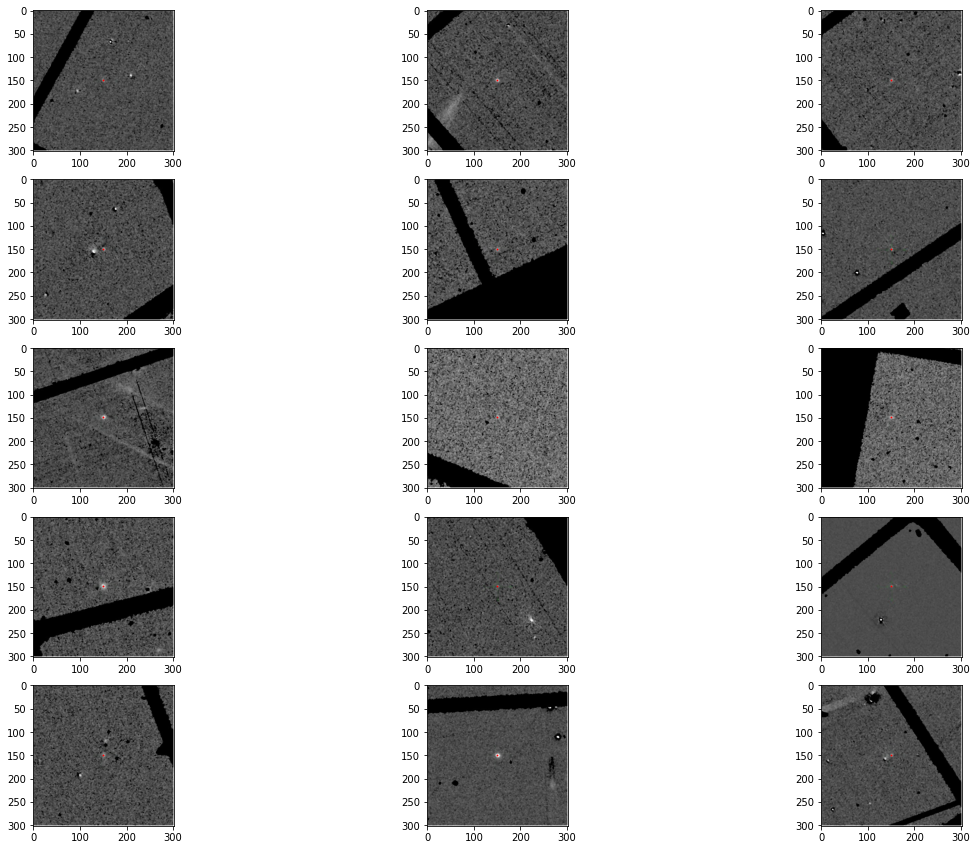

In [45]:
nimgs = 15
ncols = 3
nrows = nimgs//3
fig, axs = plt.subplots(nrows=nrows,ncols=ncols, figsize=(20,nrows*3))
for i,imgfile in enumerate(imann[:nimgs]):
    imgfi,annfi = imann[i]
    image = cv2.imread(imgfi)
    with open(annfi) as f:
        coords = f.read().split()
    cat, x1,y1,width,height = [int(float(c)*302) for c in coords]
    x2,y2 = x1+1,y1+1
    image = cv2.rectangle(image, (x1,y1), (x2,y2), color, thickness)
    axs[i//3,i%3].imshow(image)

# Near-Earth Objects (NEO)

On a daily basis, about one hundred tons of interplanetary material drifts down to the Earth’s surface. Most of the smallest interplanetary particles that reach the Earth’s surface are **the tiny dust particles that are released by comets as their ices vaporize in the solar neighborhood**. The vast majority of the larger interplanetary material that reaches the Earth’s surface originates as the collision fragments of asteroids that have run into one another some eons ago.

<img src="./imgs/astroid.jpg" />


With an average interval of about 10,000 years, rocky or iron asteroids larger than about 100 meters would be expected to reach the Earth’s surface and cause local disasters or produce the tidal waves that can inundate low lying coastal areas. *On an average of every several hundred thousand years or so, asteroids larger than a kilometer could cause global disasters*. In this case, the impact debris would spread throughout the Earth’s atmosphere so that plant life would suffer from acid rain, partial blocking of sunlight, and from the firestorms resulting from heated impact debris raining back down upon the Earth’s surface. Since their orbital paths often cross that of the Earth, collisions with near-Earth objects have occurred in the past and we should remain alert to the possibility of future close Earth approaches. It seems prudent to mount efforts to discover and study these objects, to characterize their sizes, compositions and structures and to keep an eye upon their future trajectories.

Because of the ongoing search efforts to find nearly all the large NEOs, objects will occasionally be found to be on very close Earth approaching trajectories. Great care must then be taken to verify any Earth collision predictions that are made. *Given the extremely unlikely nature of such a collision, almost all of these predictions will turn out to be false alarms*. However, if an object is verified to be on an Earth colliding trajectory, it seems likely that this collision possibility will be known several years prior to the actual event. Given several years warning time, existing technology could be used to deflect the threatening object away from Earth. The key point in this mitigation process is to find the threatening object years ahead of time so that an orderly international campaign can be mounted to send spacecraft to the threatening object. One of the techniques suggested for deflecting an asteroid includes nuclear fusion weapons set off above the surface to slightly change the asteroid’s velocity without fracturing it. High speed neutrons from the explosion would irradiate a shell of material on the surface of the asteroid facing the explosion. The material in this surface shell would then expand and blow off, thus producing a recoil upon the asteroid itself. A very modest velocity change in the asteroid’s motion (only a few millimeters per second), acting over several years, can cause the asteroid to miss the Earth entirely. However, the trick is to gently nudge the asteroid out of harm’s way and not to blow it up. This latter option, though popular in the movies, only creates a bigger problem when all the pieces encounter the Earth. Another option that has been discussed includes the establishment of large solar sails on a small threatening object so that the pressure of sunlight could eventually redirect the object away from its predicted Earth collision.

No one should be overly concerned about an Earth impact of an asteroid or comet. The threat to any one person from auto accidents, disease, other natural disasters and a variety of other problems is much higher than the threat from NEOs. Over long periods of time, however, the chances of the Earth being impacted are not negligible so that some form of NEO insurance is warranted. At the moment, our best insurance rests with the NEO scientists and their efforts to first find these objects and then track their motions into the future. We need to first find them, then keep an eye on them.

## NEO Basics

NEO Groups
In terms of orbital elements, NEOs are asteroids and comets with perihelion distance $q$ less than $1.3 au$ . Near-Earth Comets (NECs) are further restricted to include only short-period comets (i.e., orbital period P less than 200 years). The vast majority of NEOs are asteroids, referred to as Near-Earth Asteroids (NEAs). NEAs are divided into groups *(Atira, Aten, Apollo and Amor)* according to their perihelion distance (*q*), aphelion distance (*Q*) and their semi-major axes (*a*).

Potentially Hazardous Asteroids (PHAs) are currently defined based on parameters that measure the asteroid's potential to make threatening close approaches to the Earth. Specifically, all asteroids with an Earth Minimum Orbit Intersection Distance (MOID) of *0.05 au* or less and an absolute magnitude (*H*) of 22.0 or less are considered PHAs. In other words, asteroids that can't get any closer to the Earth (i.e., MOID) than 0.05 au (roughly 7,480,000 km or 4,650,000 mi) or are smaller than about 140 m (~500 ft) in diameter (i.e., H = 22.0 with assumed albedo of 14%) are not considered PHAs.

|Group  |Definition	            |Description 																																								   |
|:------|:----------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|NECs	|q<1.3 au P<200 years   |Near-Earth Comets 																																							   |
|NEAs	|q<1.3 au               |Near-Earth Asteroids																																						   |
|Atiras	|a<1.0 au Q<0.983 au	|NEAs whose orbits are contained entirely with the orbit of the Earth (named after asteroid 163693 Atira).																	   |
|Atens	|a<1.0 au Q>0.983 au	|Earth-crossing NEAs with semi-major axes smaller than Earth's (named after asteroid 2062 Aten).																			   |
|Apollos|a>1.0 au q<1.017 au	|Earth-crossing NEAs with semi-major axes larger than Earth's (named after asteroid 1862 Apollo).																			   |
|Amors	|a>1.0 au 1.017<q<1.3 au|Earth-approaching NEAs with orbits exterior to Earth's but interior to Mars' (named after asteroid 1221 Amor).																   |	
|PHAs	|MOID<=0.05 au H<=22.0	|Potentially Hazardous Asteroids: NEAs whose Minimum Orbit Intersection Distance (MOID) with the Earth is 0.05 au or less and whose absolute magnitude (H) is 22.0 or brighter.|


<img src="./imgs/neo_orbit_types.jpg" />

## Small Body Data Base (SBDB)

Dataset for small body orbiting around or close by the earth can be accessed and queried from <a href="https://ssd.jpl.nasa.gov/sbdb_query.cgi">here</a>. You may also want to visit this <a href="https://ssd.jpl.nasa.gov/?help_sbdb_query">tutorial </a>

<img src="./imgs/sbdb.png" />

## poliastro library

<a href="https://github.com/poliastro/poliastro">poliastro</a> is an open source pure Python package dedicated to problems arising in Astrodynamics and Orbital Mechanics, such as orbit propagation, solution of the Lambert's problem, conversion between position and velocity vectors and classical orbital elements and orbit plotting, focusing on interplanetary applications. It is released under the MIT license.


In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from astropy.time import Time,TimeDatetime
from poliastro.twobody.orbit import Orbit
from poliastro.bodies import Earth,Sun
from poliastro.ephem import Ephem
from poliastro.plotting import OrbitPlotter3D #import OrbitPlotter
#from poliastro.neos import neows
from poliastro.plotting.static import StaticOrbitPlotter
from poliastro.bodies import Earth, Mars, Jupiter, Sun
from astropy import units as u
import matplotlib.pyplot as plt

In [7]:
# near earth astroid https://cneos.jpl.nasa.gov/nhats/
df = pd.read_csv("../neo/cneos_nhats_data.csv")
df.head()

Object  Orbit ID  H (mag) Estimated Diameter (m)  \
0                     (2019 GM1)         2     27.0               6.9 - 31   
1                   (2000 SG344)        16     24.7                20 - 89   
2  469219 Kamo`oalewa (2016 HO3)        25     24.3               24 - 107   
3                   (2006 RH120)        50     29.5               2.2 - 10   
4                     (2020 CD3)         5     31.7             0.80 - 3.6   

   OCC Min. delta-V [delta-V, dur.] (km/s), (d)  \
0    6                               4.513, 362   
1    3                               3.549, 370   
2    0                               6.108, 362   
3    1                               3.969, 450   
4    4                               3.571, 378   

  Min. Duration [delta-V, dur.] (km/s), (d)  Viable Trajectories  \
0                                11.862, 66              5947708   
1                                11.402, 34              3302683   
2                               11.969, 154              3162138   
3                                11.410, 26              2498249   
4                                 9.358, 18              2240076   

  Next Optical Opportunity (yyyy-mm [Vp])  \
0                          2020-03 [22.9]   
1                          2028-04 [19.1]   
2                          2020-03 [22.2]   
3                          2028-06 [23.7]   
4                          2020-03 [23.5]   

  Next Arecibo Radar Opportunity (yyyy-mm [SNR])  \
0                                  2020-04 [320]   
1                                 2028-05 [3.e3]   
2                                           none   
3                                           none   
4                                  2020-03 [450]   

  Next Goldstone Radar Opportunity (yyyy-mm [SNR]) Unnamed: 11  
0                                     2040-03 [16]    bK19G01M  
1                                     2028-05 [58]    bK00SY4G  
2                                             none    a0469219  
3                                             none    bK06RC0H  
4                                             none    bK20C03D

### Table Column Descriptions  |  HIDE LEGEND

**Object**<br/>
Full designation of the target NEA (near-Earth asteroid).

**Orbit ID**<br/>
ID of the JPL NEA orbit used in this analysis

**H (mag)**<br/>
Absolute visual (V-band) magnitude in magnitude units.

**Estimated Diameter (m)**<br/>
Estimated diameter in meters showing the minimum and maximum likely size based on assumed maximum and minimum albedos of 0.60 and 0.03, respectively. If the size is "known", a single value is shown instead. If a single value is shown, it should still be considered an estimate.

**OCC**<br/>
Orbit Condition Code of the NEA's orbit when NHATS-analysis was performed, where 0 implies a well-determined orbit and 9 implies a very poorly-determined (highly uncertain) orbit.

**Min. delta-V [delta-V, dur.] (km/s), (d)**<br/>
The total delta-V in km/s and corresponding duration in days for the trajectory solution with the minimum total delta-V.

**Min. Duration [delta-V, dur.] (km/s), (d)**<br/>
The total delta-V in km/s and corresponding duration in days for the trajectory solution with the minimum possible total duration.

**Viable Trajectories**<br/>
The total number of NHATS-compliant trajectory solutions. This value serves as a proxy for accessibility of the NEA.

**Next Optical Opportunity (yyyy-mm [Vp])**<br/>
The year and month (yyyy-mm) during which the asteroid will next be observable optically from the Earth at a magnitude of 24.0 or brighter, solar elongation > 60 deg and plane-of-sky (POS) uncertainty < 1.5 deg. When the latter limit is exceeded the object is considered lost, in which case it can only be observed via a serendipitous re-discovery by an asteroid survey program. Leading and trailing '?' indicate when such a survey re-discovery may be possible. [Vp] is the predicted peak magnitude during the opportunity. Follow this <a href="https://cneos.jpl.nasa.gov/nhats/obs.html">link</a> for more details.

**Next Arecibo Radar Opportunity (yyyy-mm [SNR])**<br/>
The year and month (yyyy-mm) of the next optimal Arecibo radar observing opportunity. To be considered observable, the asteroid must be at an accessible declination, the signal-to-noise ratio (SNR) must be at least 10, and the plane-of-sky uncertainty must be less than 0.75 arc-min. [SNR] indicates the peak SNR value during the opportunity. Follow this <a href="https://cneos.jpl.nasa.gov/nhats/obs.html">link</a> for more details.

**Next Goldstone Radar Opportunity (yyyy-mm [SNR])**<br/>
The year and month (yyyy-mm) of the next optimal Goldstone radar observing opportunity. To be considered observable, the asteroid must be at an accessible declination, the signal-to-noise ratio (SNR) must be at least 10, and the plane-of-sky uncertainty must be less than 0.75 arc-min. [SNR] indicates the peak SNR value during the opportunity. Follow this <a href="https://cneos.jpl.nasa.gov/nhats/obs.html">link</a> for more details.

In [8]:
df.head()

Object  Orbit ID  H (mag) Estimated Diameter (m)  \
0                     (2019 GM1)         2     27.0               6.9 - 31   
1                   (2000 SG344)        16     24.7                20 - 89   
2  469219 Kamo`oalewa (2016 HO3)        25     24.3               24 - 107   
3                   (2006 RH120)        50     29.5               2.2 - 10   
4                     (2020 CD3)         5     31.7             0.80 - 3.6   

   OCC Min. delta-V [delta-V, dur.] (km/s), (d)  \
0    6                               4.513, 362   
1    3                               3.549, 370   
2    0                               6.108, 362   
3    1                               3.969, 450   
4    4                               3.571, 378   

  Min. Duration [delta-V, dur.] (km/s), (d)  Viable Trajectories  \
0                                11.862, 66              5947708   
1                                11.402, 34              3302683   
2                               11.969, 154              3162138   
3                                11.410, 26              2498249   
4                                 9.358, 18              2240076   

  Next Optical Opportunity (yyyy-mm [Vp])  \
0                          2020-03 [22.9]   
1                          2028-04 [19.1]   
2                          2020-03 [22.2]   
3                          2028-06 [23.7]   
4                          2020-03 [23.5]   

  Next Arecibo Radar Opportunity (yyyy-mm [SNR])  \
0                                  2020-04 [320]   
1                                 2028-05 [3.e3]   
2                                           none   
3                                           none   
4                                  2020-03 [450]   

  Next Goldstone Radar Opportunity (yyyy-mm [SNR]) Unnamed: 11  
0                                     2040-03 [16]    bK19G01M  
1                                     2028-05 [58]    bK00SY4G  
2                                             none    a0469219  
3                                             none    bK06RC0H  
4                                             none    bK20C03D

In [9]:
# renaming columns
columns = df.columns
ncolumns = {
    columns[0]: "name",
    columns[1]: "id",
    columns[2]: "v_band_mag",
    columns[3]: "diameter",
    columns[4]: "orbit_condition_code",
    columns[5]: "min_deltav",
    columns[6]: "min_duration",
    columns[7]: "viable_trajectory",
    columns[8]: "optical_opp",
    columns[9]: "gold_opp",
    columns[10]: "undefined",
}
ndf = df.rename(columns=ncolumns)
ndf.head()

name  id  v_band_mag    diameter  \
0                     (2019 GM1)   2        27.0    6.9 - 31   
1                   (2000 SG344)  16        24.7     20 - 89   
2  469219 Kamo`oalewa (2016 HO3)  25        24.3    24 - 107   
3                   (2006 RH120)  50        29.5    2.2 - 10   
4                     (2020 CD3)   5        31.7  0.80 - 3.6   

   orbit_condition_code  min_deltav min_duration  viable_trajectory  \
0                     6  4.513, 362   11.862, 66            5947708   
1                     3  3.549, 370   11.402, 34            3302683   
2                     0  6.108, 362  11.969, 154            3162138   
3                     1  3.969, 450   11.410, 26            2498249   
4                     4  3.571, 378    9.358, 18            2240076   

      optical_opp        gold_opp     undefined Unnamed: 11  
0  2020-03 [22.9]   2020-04 [320]  2040-03 [16]    bK19G01M  
1  2028-04 [19.1]  2028-05 [3.e3]  2028-05 [58]    bK00SY4G  
2  2020-03 [22.2]            none          none    a0469219  
3  2028-06 [23.7]            none          none    bK06RC0H  
4  2020-03 [23.5]   2020-03 [450]          none    bK20C03D

In [10]:
# removing () from name
ndf["name"] = ndf["name"].str.replace("(","")
ndf["name"] = ndf["name"].str.replace(")","")
ndf.head(3)

name  id  v_band_mag  diameter  \
0                     2019 GM1   2        27.0  6.9 - 31   
1                   2000 SG344  16        24.7   20 - 89   
2  469219 Kamo`oalewa 2016 HO3  25        24.3  24 - 107   

   orbit_condition_code  min_deltav min_duration  viable_trajectory  \
0                     6  4.513, 362   11.862, 66            5947708   
1                     3  3.549, 370   11.402, 34            3302683   
2                     0  6.108, 362  11.969, 154            3162138   

      optical_opp        gold_opp     undefined Unnamed: 11  
0  2020-03 [22.9]   2020-04 [320]  2040-03 [16]    bK19G01M  
1  2028-04 [19.1]  2028-05 [3.e3]  2028-05 [58]    bK00SY4G  
2  2020-03 [22.2]            none          none    a0469219

In [11]:
# Splitting Estimated Diameter to two column
ndf[['min_diameter','max_diameter']] = ndf["diameter"].str.split("-",expand=True)
ndf['min_diameter'] = ndf['min_diameter'].astype(float)
ndf['max_diameter'] = ndf['max_diameter'].astype(float)
ndf.head()

name  id  v_band_mag    diameter  \
0                     2019 GM1   2        27.0    6.9 - 31   
1                   2000 SG344  16        24.7     20 - 89   
2  469219 Kamo`oalewa 2016 HO3  25        24.3    24 - 107   
3                   2006 RH120  50        29.5    2.2 - 10   
4                     2020 CD3   5        31.7  0.80 - 3.6   

   orbit_condition_code  min_deltav min_duration  viable_trajectory  \
0                     6  4.513, 362   11.862, 66            5947708   
1                     3  3.549, 370   11.402, 34            3302683   
2                     0  6.108, 362  11.969, 154            3162138   
3                     1  3.969, 450   11.410, 26            2498249   
4                     4  3.571, 378    9.358, 18            2240076   

      optical_opp        gold_opp     undefined Unnamed: 11  min_diameter  \
0  2020-03 [22.9]   2020-04 [320]  2040-03 [16]    bK19G01M           6.9   
1  2028-04 [19.1]  2028-05 [3.e3]  2028-05 [58]    bK00SY4G          20.0   
2  2020-03 [22.2]            none          none    a0469219          24.0   
3  2028-06 [23.7]            none          none    bK06RC0H           2.2   
4  2020-03 [23.5]   2020-03 [450]          none    bK20C03D           0.8   

   max_diameter  
0          31.0  
1          89.0  
2         107.0  
3          10.0  
4           3.6

In [12]:
# splitting min_deltav
ndf[['min_deltav_dv','min_deltav_dur']] = ndf["min_deltav"].str.split(",",expand=True)
ndf['min_deltav_dv'] = ndf['min_deltav_dv'].astype(float)
ndf['min_deltav_dur'] = ndf['min_deltav_dur'].astype(float)
# splitting min_duration
ndf[['min_duration_dv','min_duration_dur']] = ndf["min_deltav"].str.split(",",expand=True)
ndf['min_duration_dv'] = ndf['min_duration_dv'].astype(float)
ndf['min_duration_dur'] = ndf['min_duration_dur'].astype(float)
ndf.head()

name  id  v_band_mag    diameter  \
0                     2019 GM1   2        27.0    6.9 - 31   
1                   2000 SG344  16        24.7     20 - 89   
2  469219 Kamo`oalewa 2016 HO3  25        24.3    24 - 107   
3                   2006 RH120  50        29.5    2.2 - 10   
4                     2020 CD3   5        31.7  0.80 - 3.6   

   orbit_condition_code  min_deltav min_duration  viable_trajectory  \
0                     6  4.513, 362   11.862, 66            5947708   
1                     3  3.549, 370   11.402, 34            3302683   
2                     0  6.108, 362  11.969, 154            3162138   
3                     1  3.969, 450   11.410, 26            2498249   
4                     4  3.571, 378    9.358, 18            2240076   

      optical_opp        gold_opp     undefined Unnamed: 11  min_diameter  \
0  2020-03 [22.9]   2020-04 [320]  2040-03 [16]    bK19G01M           6.9   
1  2028-04 [19.1]  2028-05 [3.e3]  2028-05 [58]    bK00SY4G          20.0   
2  2020-03 [22.2]            none          none    a0469219          24.0   
3  2028-06 [23.7]            none          none    bK06RC0H           2.2   
4  2020-03 [23.5]   2020-03 [450]          none    bK20C03D           0.8   

   max_diameter  min_deltav_dv  min_deltav_dur  min_duration_dv  \
0          31.0          4.513           362.0            4.513   
1          89.0          3.549           370.0            3.549   
2         107.0          6.108           362.0            6.108   
3          10.0          3.969           450.0            3.969   
4           3.6          3.571           378.0            3.571   

   min_duration_dur  
0             362.0  
1             370.0  
2             362.0  
3             450.0  
4             378.0

In [13]:
# splitting and changing optical_opp to datetime
nndf = ndf.copy()
nndf[['optical_opp','optical_opp_mag']] = ndf["optical_opp"].str.split(" ",expand=True)
nndf['optical_opp'] = nndf['optical_opp'].replace("none","")
nndf['optical_opp'] = nndf['optical_opp'].str.strip("?")
nndf['optical_opp'] = pd.to_datetime(nndf['optical_opp'],infer_datetime_format=True)
# cleaning optical_opp_mag
nndf['optical_opp_mag'] = nndf['optical_opp_mag'].str.replace("[","")
nndf['optical_opp_mag'] = nndf['optical_opp_mag'].str.replace("]","")
nndf['optical_opp_mag'] = nndf['optical_opp_mag'].str.strip("?")
nndf['optical_opp_mag'] = nndf['optical_opp_mag'].astype(float)
nndf.head(5)

name  id  v_band_mag    diameter  \
0                     2019 GM1   2        27.0    6.9 - 31   
1                   2000 SG344  16        24.7     20 - 89   
2  469219 Kamo`oalewa 2016 HO3  25        24.3    24 - 107   
3                   2006 RH120  50        29.5    2.2 - 10   
4                     2020 CD3   5        31.7  0.80 - 3.6   

   orbit_condition_code  min_deltav min_duration  viable_trajectory  \
0                     6  4.513, 362   11.862, 66            5947708   
1                     3  3.549, 370   11.402, 34            3302683   
2                     0  6.108, 362  11.969, 154            3162138   
3                     1  3.969, 450   11.410, 26            2498249   
4                     4  3.571, 378    9.358, 18            2240076   

  optical_opp        gold_opp     undefined Unnamed: 11  min_diameter  \
0  2020-03-01   2020-04 [320]  2040-03 [16]    bK19G01M           6.9   
1  2028-04-01  2028-05 [3.e3]  2028-05 [58]    bK00SY4G          20.0   
2  2020-03-01            none          none    a0469219          24.0   
3  2028-06-01            none          none    bK06RC0H           2.2   
4  2020-03-01   2020-03 [450]          none    bK20C03D           0.8   

   max_diameter  min_deltav_dv  min_deltav_dur  min_duration_dv  \
0          31.0          4.513           362.0            4.513   
1          89.0          3.549           370.0            3.549   
2         107.0          6.108           362.0            6.108   
3          10.0          3.969           450.0            3.969   
4           3.6          3.571           378.0            3.571   

   min_duration_dur  optical_opp_mag  
0             362.0             22.9  
1             370.0             19.1  
2             362.0             22.2  
3             450.0             23.7  
4             378.0             23.5

In [14]:
# splitting and changing radar_opp to datetime
# nnndf = nndf.copy()
# nnndf[['radar_opp','radar_opp_snr']] = ndf["radar_opp"].str.split(" ",expand=True)
# nnndf['radar_opp'] = nnndf['radar_opp'].replace("none","")
# nnndf['radar_opp'] = nnndf['radar_opp'].str.strip("?")
# nnndf['radar_opp'] = pd.to_datetime(nnndf['radar_opp'],infer_datetime_format=True)
# cleaning next radar_opp_snr
# nnndf['radar_opp_snr'] = nnndf['radar_opp_snr'].str.replace("[","")
# nnndf['radar_opp_snr'] = nnndf['radar_opp_snr'].str.replace("]","")
# nnndf['radar_opp_snr'] = nnndf['radar_opp_snr'].str.strip("?")
# nnndf['radar_opp_snr'] = nnndf['radar_opp_snr'].astype(float)
#nnndf.head(5)

In [15]:
# splitting and changing radar_opp to datetime
# nnndf = nndf.copy()
# nnndf[['radar_opp','radar_opp_snr']] = ndf["radar_opp"].str.split(" ",expand=True)
# nnndf['radar_opp'] = nnndf['radar_opp'].replace("none","")
# nnndf['radar_opp'] = nnndf['radar_opp'].str.strip("?")
# nnndf['radar_opp'] = pd.to_datetime(nnndf['radar_opp'],infer_datetime_format=True)
# # cleaning radar_opp_snr
# nnndf['radar_opp_snr'] = nnndf['radar_opp_snr'].str.replace("[","")
# nnndf['radar_opp_snr'] = nnndf['radar_opp_snr'].str.replace("]","")
# nnndf['radar_opp_snr'] = nnndf['radar_opp_snr'].str.strip("?")
# nnndf['radar_opp_snr'] = nnndf['radar_opp_snr'].astype(float)
# nnndf.head(5)

In [16]:
# splitting and changing gold_opp to datetime
nnnndf = nndf.copy()
nnnndf[['gold_opp','gold_opp_snr']] = ndf["gold_opp"].str.split(" ",expand=True)
nnnndf['gold_opp'] = nnnndf['gold_opp'].replace("none","")
nnnndf['gold_opp'] = nnnndf['gold_opp'].str.strip("?")
nnnndf['gold_opp'] = pd.to_datetime(nnnndf['gold_opp'],infer_datetime_format=True)
# cleaning gold_opp_snr
nnnndf['gold_opp_snr'] = nnnndf['gold_opp_snr'].str.replace("[","")
nnnndf['gold_opp_snr'] = nnnndf['gold_opp_snr'].str.replace("]","")
nnnndf['gold_opp_snr'] = nnnndf['gold_opp_snr'].str.strip("?")
nnnndf['gold_opp_snr'] = nnnndf['gold_opp_snr'].astype(float)
nnnndf.head(5)

name  id  v_band_mag    diameter  \
0                     2019 GM1   2        27.0    6.9 - 31   
1                   2000 SG344  16        24.7     20 - 89   
2  469219 Kamo`oalewa 2016 HO3  25        24.3    24 - 107   
3                   2006 RH120  50        29.5    2.2 - 10   
4                     2020 CD3   5        31.7  0.80 - 3.6   

   orbit_condition_code  min_deltav min_duration  viable_trajectory  \
0                     6  4.513, 362   11.862, 66            5947708   
1                     3  3.549, 370   11.402, 34            3302683   
2                     0  6.108, 362  11.969, 154            3162138   
3                     1  3.969, 450   11.410, 26            2498249   
4                     4  3.571, 378    9.358, 18            2240076   

  optical_opp   gold_opp     undefined Unnamed: 11  min_diameter  \
0  2020-03-01 2020-04-01  2040-03 [16]    bK19G01M           6.9   
1  2028-04-01 2028-05-01  2028-05 [58]    bK00SY4G          20.0   
2  2020-03-01        NaT          none    a0469219          24.0   
3  2028-06-01        NaT          none    bK06RC0H           2.2   
4  2020-03-01 2020-03-01          none    bK20C03D           0.8   

   max_diameter  min_deltav_dv  min_deltav_dur  min_duration_dv  \
0          31.0          4.513           362.0            4.513   
1          89.0          3.549           370.0            3.549   
2         107.0          6.108           362.0            6.108   
3          10.0          3.969           450.0            3.969   
4           3.6          3.571           378.0            3.571   

   min_duration_dur  optical_opp_mag  gold_opp_snr  
0             362.0             22.9         320.0  
1             370.0             19.1        3000.0  
2             362.0             22.2           NaN  
3             450.0             23.7           NaN  
4             378.0             23.5         450.0

# <div align="center"><font color="red">....WaW.....</font></span>

### Time to learning about those threatening stones

In [17]:
nea = nnnndf.copy()
#columns = ['name', 'v_band_mag', 'diameter','min_deltav', 'min_duration', 'optical_opp','radar_opp', 'gold_opp']
columns = ['name', 'v_band_mag', 'diameter','min_deltav', 'min_duration', 'optical_opp', 'gold_opp']

In [18]:
# 1. What are the properties of the largest astroid?
#one way
mnea1 = nea[nea["max_diameter"]==nea["max_diameter"].max()]
# another way
mnea2 = nea.iloc[nea['max_diameter'].idxmax()]
mnea2[columns]

name            1943 Anteros 1973 EC
v_band_mag                      15.6
diameter                 1320 - 5901
min_deltav               11.705, 370
min_duration             11.918, 354
optical_opp      2020-10-01 00:00:00
gold_opp         2026-06-01 00:00:00
Name: 2760, dtype: object

In [19]:
# 2. What are the properties of the smallest astroid?
snea = nea[~nea["max_diameter"].isnull()].reset_index()
snea.loc[snea['max_diameter'].idxmin()][columns]

name               2019 AS5
v_band_mag             32.3
diameter         0.60 - 2.7
min_deltav      11.322, 426
min_duration    11.883, 306
optical_opp             NaT
gold_opp                NaT
Name: 2063, dtype: object

In [20]:
# 3. What are the properties of the astroid with the highest visual band?
hvb = nea.iloc[nea['v_band_mag'].idxmin()]
hvb[columns]

name            1943 Anteros 1973 EC
v_band_mag                      15.6
diameter                 1320 - 5901
min_deltav               11.705, 370
min_duration             11.918, 354
optical_opp      2020-10-01 00:00:00
gold_opp         2026-06-01 00:00:00
Name: 2760, dtype: object

In [21]:
# sort by visual band
nea['v_band_mag'].sort_values()

2760    15.6
2680    16.7
2493    16.7
1774    17.9
2323    18.1
        ... 
4       31.7
708     32.0
2923    32.0
1132    32.1
2063    32.3
Name: v_band_mag, Length: 2928, dtype: float64

In [22]:
epoch = Time.now().tdb
hvbor = Orbit.from_sbdb(hvb.name)
hvbor = hvbor.propagate(epoch)
plotter = OrbitPlotter3D()
plotter.plot_body_orbit(Earth, epoch, label="Earth",)
plotter.plot(hvbor, label=hvb.name)

In [23]:
# 4. What are the properties of the astroid with the lowest visual band?
lvb = nea.iloc[nea['v_band_mag'].idxmax()]
lvb[columns]

name               2019 AS5
v_band_mag             32.3
diameter         0.60 - 2.7
min_deltav      11.322, 426
min_duration    11.883, 306
optical_opp             NaT
gold_opp                NaT
Name: 2063, dtype: object

In [24]:
epoch = Time.now().tdb
lvbo = Orbit.from_sbdb(lvb.name)
lvbo = lvbo.propagate(epoch)
plotter = OrbitPlotter3D()
plotter.plot_body_orbit(Earth, epoch, label="Earth",color="red")
plotter.plot(lvbo, label=lvb.name)

In [25]:
# 5. What are the properties of the astroid with the highest optical oppurtinity magnitude?
hopm = nea.iloc[nea['optical_opp_mag'].idxmin()]
hopm[columns+["optical_opp_mag"]]

name                         2015 RN35
v_band_mag                        23.1
diameter                      42 - 187
min_deltav                  8.758, 274
min_duration               11.942, 106
optical_opp        2022-07-01 00:00:00
gold_opp           2022-12-01 00:00:00
optical_opp_mag                   13.3
Name: 1559, dtype: object

In [26]:
#epoch = Time.now().tdb
epoch = Time(hopm.optical_opp,scale="tdb")
hopmor = Orbit.from_sbdb(hopm.name)
hopmor = hopmor.propagate(epoch)
plotter = OrbitPlotter3D()
plotter.plot_body_orbit(Earth, epoch, label="Earth",color="red")
plotter.plot(hopmor, label=hopm.name)

In [27]:
from poliastro.twobody.mean_elements import get_mean_elements
earth_ephem = Ephem.from_body(Earth, epoch)
earth_orbit = Orbit.from_ephem(Earth.parent,earth_ephem,epoch)
sun_ephem = Ephem.from_body(Sun, epoch)
sun_orbit = Orbit.from_ephem(Sun.parent,sun_ephem,epoch)

In [28]:
# finding the distance between earth and the sun
from poliastro.util import norm
from poliastro.util import time_range

distance = lambda x,y: norm(x.r - y.r)
esdistance = distance(sun_orbit,earth_orbit)
esdistance.to(u.au)

<Quantity 1.01668443 AU>

In [29]:
# finding the distance between 2015 RN35 and the earth at it is closest
epoch = Time(hopm.optical_opp,scale="tdb")
earth_ephem = Ephem.from_body(Earth, epoch)
earth_orbit = Orbit.from_ephem(Earth.parent,earth_ephem,epoch)
hopmor = hopmor.propagate(epoch)
rndistance = distance(hopmor,earth_orbit)
rndistance

<Quantity 4.90853019e+08 km>

In [30]:
from astropy import units as u
rndistance.to(u.au)

<Quantity 3.28114977 AU>

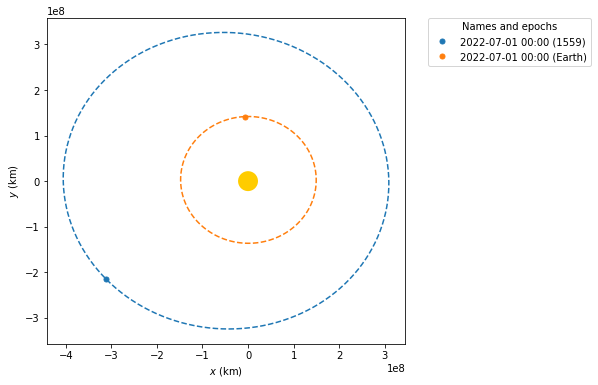

In [31]:
plotter = StaticOrbitPlotter()
plotter.plot(hopmor,label=hopm.name)
plotter.plot(earth_orbit,label="Earth")

In [32]:
# 6. What is the closest astroid?
closest = nea.iloc[nea['min_deltav_dur'].idxmin()]
closest[columns+["min_deltav_dur"]]

name                         2016 VY1
v_band_mag                       24.7
diameter                      20 - 89
min_deltav                 7.403, 170
min_duration               11.823, 90
optical_opp       2023-05-01 00:00:00
gold_opp          2029-11-01 00:00:00
min_deltav_dur                  170.0
Name: 1147, dtype: object

In [33]:
epoch = Time.now().tdb
clso = Orbit.from_sbdb(closest.name)
clso = clso.propagate(epoch)
plotter = OrbitPlotter3D()
plotter.plot_body_orbit(Earth, epoch, label="Earth",color="red")
plotter.plot(clso, label=closest.name)

In [34]:
# finding the distance between the closest and the earth at it is closest
epoch = Time(closest.optical_opp,scale="tdb")
earth_ephem = Ephem.from_body(Earth, epoch)
earth_orbit = Orbit.from_ephem(Earth.parent,earth_ephem,epoch)
clso = clso.propagate(epoch)
clsodistance = distance(clso,earth_orbit)
clsodistance

<Quantity 5.30155083e+08 km>

In [35]:
#distance
clsodistance.to(u.au)

<Quantity 3.54386784 AU>

In [36]:
# 7. Things to be seen this year
thisYear = nea[nea['optical_opp'].dt.year == 2022].reset_index(drop=True)
thisYear.head(5)[columns]

name  v_band_mag  diameter  min_deltav min_duration optical_opp  \
0    2009 BD        28.1  4.2 - 19  4.728, 362   11.923, 74  2022-11-01   
1  2012 HK31        25.4   14 - 65  5.949, 418   11.859, 66  2022-03-01   
2  2010 TE55        28.0  4.4 - 20  5.043, 450   11.712, 66  2022-07-01   
3  2012 BB14        25.0   17 - 78  5.065, 362  11.915, 106  2022-12-01   
4    2015 DU        26.6  8.3 - 37  6.069, 362  11.907, 138  2022-07-01   

  gold_opp  
0      NaT  
1      NaT  
2      NaT  
3      NaT  
4      NaT

In [37]:
# count
thisYear[columns]

name  v_band_mag  diameter   min_deltav min_duration optical_opp  \
0      2009 BD        28.1  4.2 - 19   4.728, 362   11.923, 74  2022-11-01   
1    2012 HK31        25.4   14 - 65   5.949, 418   11.859, 66  2022-03-01   
2    2010 TE55        28.0  4.4 - 20   5.043, 450   11.712, 66  2022-07-01   
3    2012 BB14        25.0   17 - 78   5.065, 362  11.915, 106  2022-12-01   
4      2015 DU        26.6  8.3 - 37   6.069, 362  11.907, 138  2022-07-01   
..         ...         ...       ...          ...          ...         ...   
180   2018 GJ5        24.6   21 - 94  11.895, 370  11.945, 370  2022-10-01   
181   2017 QD3        22.3  60 - 270  11.868, 370  11.902, 362  2022-05-01   
182   2019 JR1        24.5   22 - 98  11.966, 370  11.990, 362  2022-10-01   
183  2009 SK15        25.3   15 - 68  11.986, 362  11.986, 362  2022-03-01   
184  2015 VQ65        24.6   21 - 94  11.815, 362  11.815, 362  2022-04-01   

    gold_opp  
0        NaT  
1        NaT  
2        NaT  
3        NaT  
4        NaT  
..       ...  
180      NaT  
181      NaT  
182      NaT  
183      NaT  
184      NaT  

[185 rows x 7 columns]

In [38]:
# largest in diamter
largestThisYear = thisYear.iloc[thisYear['max_diameter'].idxmax()][columns]
largestThisYear

name               452389 2002 NW16
v_band_mag                     18.1
diameter                 417 - 1866
min_deltav              10.579, 354
min_duration            11.910, 338
optical_opp     2022-05-01 00:00:00
gold_opp        2023-07-01 00:00:00
Name: 146, dtype: object

In [39]:
epoch = Time(largestThisYear["optical_opp"], scale="tdb")

lg = Orbit.from_sbdb(largestThisYear.name)
lg = lg.propagate(epoch)
earth_ephem = Ephem.from_body(Earth, epoch)
earth_orbit = Orbit.from_ephem(Earth.parent,earth_ephem,epoch)

plotter = OrbitPlotter3D()
plotter.plot(earth_orbit, label="Earth")
plotter.plot(lg, label=largestThisYear.name)

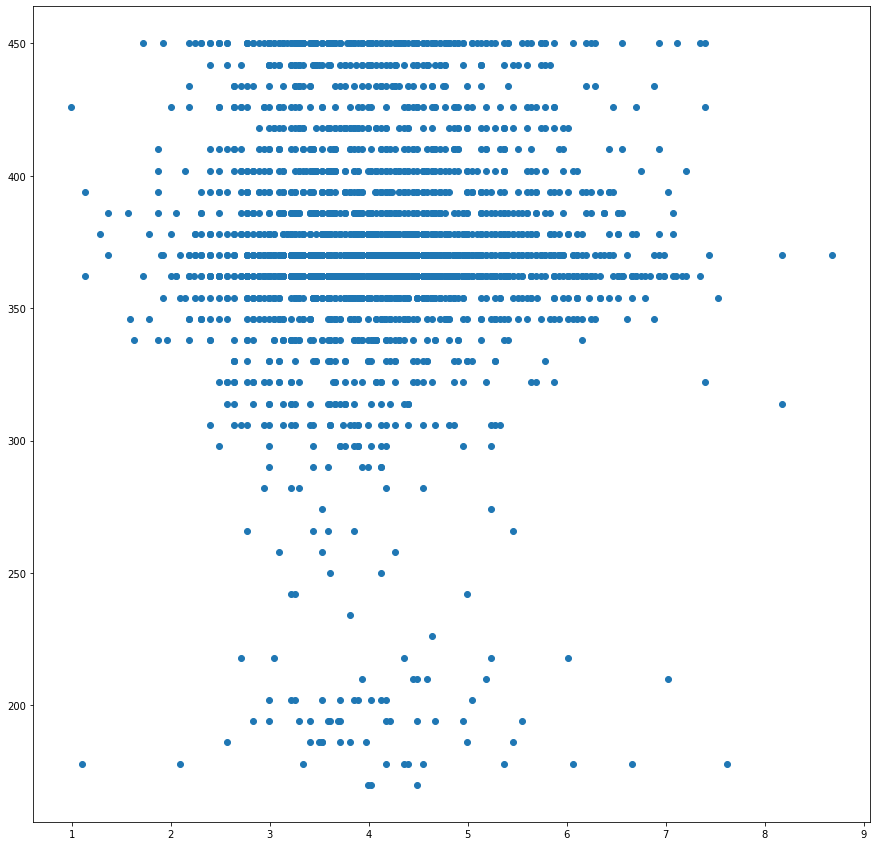

In [40]:
# 7. Diameter vs Duration
import matplotlib.pyplot as plt
plt.scatter(np.log(nea["max_diameter"]),nea["min_deltav_dur"])
plt.gcf().set_size_inches((15,15))

In [41]:
# 8 Close and big
condition = (np.log(nea["max_diameter"]) > 6) & (nea["min_deltav_dur"] < 200)
closebig = nea[condition][columns]
closebig

name  v_band_mag    diameter   min_deltav min_duration  \
1774  163899 2003 SD220        17.9  458 - 2046   9.851, 178  11.774, 122   
1911  490581 2009 WZ104        20.0   174 - 778   9.727, 178  11.976, 130   
1975           2016 JC6        21.3    96 - 428  10.155, 178  11.869, 114   

     optical_opp   gold_opp  
1774  2021-10-01 2021-09-01  
1911  2020-11-01 2024-11-01  
1975  2021-04-01 2024-05-01

In [42]:
closebig1 = closebig.iloc[0]
epoch = Time(closebig1["optical_opp"], scale="tdb")

cb1 = Orbit.from_sbdb(closebig1.name).propagate(epoch)
earth_ephem = Ephem.from_body(Earth, epoch)
earth_orbit = Orbit.from_ephem(Earth.parent,earth_ephem,epoch)

plotter = OrbitPlotter3D()
plotter.plot(earth_orbit, label="Earth")
plotter.plot(cb1, label=closebig1.name)

# Spectrum & Deep Learning

## Astronomy: Classifying Stars

When astronomers look through their telescopes, they see billions of stars. How do they make sense of all these stars? How do they classify stars into types, and how do they tell which types are common and which are rare? Most importantly, how do they use the star types they see to learn useful information about stars?

<img src="./imgs/stars.jpg" width=800/>


### Spectral Peaks and Valleys

If thermal radiation were the only source of light from a star, the star's spectrum would be a nice smooth curve. However, actual spectra observed from stars have a series of peaks and valleys as shown in the spectrum below, meaning some of their light comes from "non-thermal" radiation - light emitted or absorbed by a process other than random jostling of atoms.

<img src="./imgs/specById.gif" width=800/>

Many of these peaks and valleys have labels on them. You may recognize some of these labels as the symbols of chemical elements.

Every star has a unique pattern of peaks and valleys, and these patterns can be grouped into "spectral types" of stars. The traditional spectral types are denoted by the letters <font color="green">O,B,A,F,G,K,M</font> (and some new spectral types have been added in the last couple of years...more on those later!)

### Energy Levels of Electrons

<img src="./imgs/electron.gif" align="right" />

As you may remember from chemistry, an atom consists of electrons orbiting around a nucleus. However, the electrons cannot choose any orbit they wish. They are restricted to orbits with only certain energies. Electrons can jump from one energy level to another, but they can never have orbits with energies other than the allowed energy levels.

Let's look at the simplest atom, a neutral hydrogen atom. Its energy levels are given in the diagram below. The x-axis shows the allowed energy levels of electrons in a hydrogen atom, numbered from 1 to 5. The y-axis shows each level's energy in electron volts (eV). One electron volt is the energy that an electron gains when it travels through a potential difference of one volt (1 eV = 1.6 x 10-19 Joules).


<img src="./imgs/energy.jpg" />

Electrons in a hydrogen atom must be in one of the allowed energy levels. If an electron is in the first energy level, it must have exactly -13.6 eV of energy. If it is in the second energy level, it must have -3.4 eV of energy. An electron in a hydrogen atom cannot have -9 eV, -8 eV or any other value in between.

Let's say the electron wants to jump from the first energy level, n = 1, to the second energy level n = 2. The second energy level has higher energy than the first, so to move from n = 1 to n = 2, the electron needs to gain energy. It needs to gain (-3.4) - (-13.6) = 10.2 eV of energy to make it up to the second energy level.

The electron can gain the energy it needs by absorbing light. If the electron jumps from the second energy level down to the first energy level, it must give off some energy by emitting light. The atom absorbs or emits light in discrete packets called photons, and each photon has a definite energy. Only a photon with an energy of exactly 10.2 eV can be absorbed or emitted when the electron jumps between the n = 1 and n = 2 energy levels.

The energy that a photon carries depends on its wavelength. Since the photons absorbed or emitted by electrons jumping between the n = 1 and n = 2 energy levels must have exactly 10.2 eV of energy, the light absorbed or emitted must have a definite wavelength. This wavelength can be found from the equation

$$E = \frac{hc}{l}$$

where E is the energy of the photon (in eV), h is Planck's constant (4.14 x 10-15 eV s) and c is the speed of light (3 x 108 m/s). Rearranging this equation to find the wavelength gives

$$l = \frac{hc}{E}$$

A photon with an energy of 10.2 eV has a wavelength of 1.21 x $10^{-7}$ m, in the ultraviolet part of the spectrum. So when an electron wants to jump from n = 1 to n = 2, it must absorb a photon of ultraviolet light. When an electron drops from n = 2 to n = 1, it emits a photon of ultraviolet light.

The step from the second energy level to the third is much smaller. It takes only 1.89 eV of energy for this jump. It takes even less energy to jump from the third energy level to the fourth, and even less from the fourth to the fifth.

What would happen if the electron gained enough energy to make it all the way to 0eV? The electron would then be free of the hydrogen atom. The atom would be missing an electron, and would become a hydrogen ion.

The table below shows the first five energy levels of a hydrogen atom.

<table border="1" cellpadding="2" cellspacing="2" width="55%" id="AutoNumber1" height="111"><tbody><tr>
<td><p class="caption">Energy Level</p></td>
<td><p class="caption">Energy</p></td>
</tr>
<tr>
<td><p>1</p></td>
<td><p>-13.6 eV</p></td>
</tr>
<tr>
<td><p>2</p></td>
<td><p>-3.4 eV</p></td>
</tr>
<tr>
<td><p>3</p></td>
<td><p>-1.51 eV</p></td>
</tr>
<tr>
<td><p>4</p></td>
<td><p>-.85 eV</p></td>
</tr>
<tr>
<td><p>5</p></td>
<td><p>-.54 eV</p></td>
</tr></tbody></table>

You can use this method to find the wavelengths emitted by electrons jumping between energy levels in various elements. However, finding the correct energy levels gets much more difficult for larger atoms with many electrons. In fact, the energy levels of neutral helium are different from the energy levels of singly ionized helium! Therefore, we will skip how to calculate all the energy levels for different atoms for now. The energy levels are published in the CRC Handbook of Chemistry and Physics if you want to look them up.


# Absorption and Emission Lines

<img src="./imgs/absorbtion.gif" align="right" />

Now we can start making the connection between the peaks and valleys we see in a star's spectrum and the energy levels of the star's atoms. Let's say that I shine a light with all the colors of the spectrum through a cloud of hydrogen gas. Not all of the light will make it through. All the photons that have exactly 10.2 eV of energy will not make it through the hydrogen, because they will be absorbed by hydrogen atoms jumping from the first energy level to the second energy level. Likewise, no light with an energy of 1.89 eV will make it through; those photons will be absorbed by hydrogen atoms jumping from the second energy level to the third energy level. The light that the hydrogen cloud absorbs shows up as dips in the cloud's spectrum.

If the cloud were too hot, however, all its hydrogen atoms will crash into each other with enough force to free their electrons, and the gas will become ionized. The hot cloud's hydrogen ions have no electrons, so they cannot absorb light. When you look at the hot cloud's spectrum, you will not see any valleys from hydrogen absorption lines. Ionization occurs at about 10,000 K for hydrogen. Therefore, if you do not see hydrogen lines in the hot cloud's spectrum, you can conclude it is hotter than 10,000 K.

However, if the cloud were too cool, then the light would not have enough energy to boost its electrons into higher energy levels. In this case, you also would not see any hydrogen lines in the cloud's spectrum. You would see the strongest hydrogen lines for a cloud that is at about 9000 K.

If you saw a cloud whose spectrum showed no hydrogen lines, how would you tell if it were hot or cool? For a cloud of pure hydrogen, you couldn't. But for real stars, which contain atoms of many elements besides hydrogen, you could look at the absorption and emission lines of other elements.



# Absorption and Emission Lines in Real Stars

For most elements, there is a certain temperature at which their emission and absorption lines are strongest. The lines you see in a star's spectrum act like thermometers. Some compounds, like titanium oxide, only appear in the spectra of very cool stars. Others, like helium, appear only in the spectra of very hot stars.

Therefore, the sequence of spectral types, OBAFGKM, is actually a temperature sequence with O representing the hottest stars and M representing the coolest stars.

Here are some useful devices to remember the order of the spectral types:

<img src="imgs/obafgkm2.jpg" />


The table below shows some of the characteristic absorption and emission lines of each star.

<table border="1" cellspacing="2" cellpadding="2" width="85%">
        <tbody><tr>
          <td width="15%"><p class="caption">Spectral Type</p></td>
          <td width="18%"><p class="caption">Temperature 
          (Kelvin)</p></td>
          <td width="67%"><p class="caption">Spectral Lines</p></td>
        </tr>
        <tr>
          <td width="15%"><p>O</p></td>
          <td width="18%"><p>28,000 - 50,000</p></td>
          <td width="67%"><p>Ionized helium</p></td>
        </tr>
        <tr>
          <td width="15%"><p>B</p></td>
          <td width="18%"><p>10,000 - 28,000</p></td>
          <td width="67%"><p>Helium, some 
          hydrogen</p></td>
        </tr>
        <tr>
          <td width="15%"><p>A</p></td>
          <td width="18%"><p>7500 - 10,000</p></td>
          <td width="67%"><p>Strong hydrogen, 
          some ionized metals</p></td>
        </tr>
        <tr>
          <td width="15%"><p>F</p></td>
          <td width="18%"><p>6000 - 7500</p></td>
          <td width="67%"><p>Hydrogen, ionized 
          calcium (labeled H and K on spectra) and iron</p></td>
        </tr>
        <tr>
          <td width="15%"><p>G</p></td>
          <td width="18%"><p>5000 - 6000</p></td>
          <td width="67%"><p>Neutral and ionized 
          metals, especially calcium; strong G band</p></td>
        </tr>
        <tr>
          <td width="15%"><p>K</p></td>
          <td width="18%"><p>3500 - 5000</p></td>
          <td width="67%"><p>Neutral metals, 
          sodium
          </p></td>
        </tr>
        <tr>
          <td width="15%"><p>M</p></td>
          <td width="18%"><p>2500 - 3500</p></td>
          <td width="67%"><p>Strong titanium 
          oxide, very strong sodium</p></td>
        </tr>
      </tbody></table>

You may not know where all of these elements have their emission lines.  The chart below lists some of the more common ones and their approximate location in the electromagnetic spectrum.
      
<table border="1" cellspacing="2" width="81%" id="AutoNumber3">
        <tbody><tr>
          <td width="29%"><p class="caption">Spectral Lines</p></td>
          <td width="71%"><p class="caption">Wavelengths (Angstroms)</p></td>
        </tr>
        <tr>
          <td width="29%"><p>H<sub><font face="symbol">a</font></sub>, 
          H<sub><font face="symbol">b</font></sub>, H<sub><font face="symbol">g</font></sub></p></td>
          <td width="71%"><p>6600, 4800, 4350</p></td>
        </tr>
        <tr>
          <td width="29%"><p>Ionized Calcium H and K Lines</p></td>
          <td width="71%"><p>3800 - 4000</p></td>
        </tr>
        <tr>
          <td width="29%"><p>Titanium Oxide</p></td>
          <td width="71%"><p>lots of lines from 4900 - 5200, 
          5400 - 5700, 6200 - 6300, 6700 - 6900</p></td>
        </tr>
        <tr>
          <td width="29%"><p>G Band</p></td>
          <td width="71%"><p>4250</p></td>
        </tr>
        <tr>
          <td width="29%"><p>Sodium </p></td>
          <td width="71%"><p>5800</p></td>
        </tr>
        <tr>
          <td width="29%"><p>Helium (neutral)</p></td>
          <td width="71%"><p>4200</p></td>
        </tr>
        <tr>
          <td width="29%"><p>Helium (ionized)</p></td>
          <td width="71%"><p>4400</p></td>
        </tr>
      </tbody></table>
      
      
<img src="imgs/spectra1.gif" > 

# Identifying the Spectral Types of Stars

So, what type of star did you think it was? The star had all the hydrogen lines, so that narrows our choices down to B, A, and F. However, it had no helium lines, so that rules out a type B star. The star did have ionized calcium (the H and K lines), which are characteristic of a type F star. So the star is a type F star. The star whose spectrum you identified is shown to the right. (The picture shows two stars close together; the star you identified is the larger one on the bottom left.)

Another way to find the temperatures of stars is to find the peak wavelengths of their thermal radiation curves. Any non-reflective object, including a star, emits light at a certain peak wavelength depending on its temperature (see the Color project for a more detailed explanation). The temperature of such an object can be found by using the equation

$$T = \frac{2.897 \times 10^{-3} m K}{l_{peak}}$$

The star whose spectrum was shown on the last page has a peak wavelength of about 4200 Angstroms (1 Angstrom = $10^{-10}$ m). This yields a temperature of about 
$T = \frac{2.897 \times 10^{-3} m K}{(4.2 \times 10^{-7} m)}$ = 6900K, close to the middle of the temperature range for a type F star.

The peak wavelength is not always in the portion of the spectrum we observe, however. The spectra taken by the SDSS do not cover the entire electromagnetic spectrum. If a star has a peak wavelength in the ultraviolet (beyond 4,000 Angstroms) or in the infrared (beyond 10,000 Angstroms), you cannot see the peak. However, you will still be able to see spectral lines for the star, so you can still use the OBAFGKM spectral type classification to find the star's approximate temperature.

Now, it's your turn to start classifying stars on your own.

### Code time

In [1]:
import os
import glob # for listing files
from astropy.io import fits # for opening fits file
import pandas as pd # for creating dataframe of tabular data
import matplotlib.pyplot as plt # for plotting
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from utils import download_file_12,download_file_16,get_spectrum_data,plot_spectrum, clean_data,encode_target,get_spectrum_and_class

In [2]:
skyserver_params = [(266,51630,483,"A"),
(294,51986,623,"F"),
(266,51630,394,"A"),
(297,51959,316,"K"),
(266,51630,344,"K"),
(273,51957,391,"A"),
(282,51658,527,"A"),
(281,51614,398,"A"),
(268,51633,66,"F"),
(310,51990,178,"M")]

In [3]:
# downloading data
for f,g,b,_ in skyserver_params:
    download_file_12(f,g,b)

In [4]:
# getting data
sky_server_data = []
for p,m,f,cat in skyserver_params:
    try:
        xspec,yspec, lineName,lineWave = get_spectrum_data(f"data/archive/{p}_{m}_{f}.fits")
        sky_server_data.append((f"{p}_{m}_{f}",np.array(xspec),np.array(yspec), lineName,lineWave,cat))
    except:
        print(f"failed on data/{p}_{m}_{f}.fits")

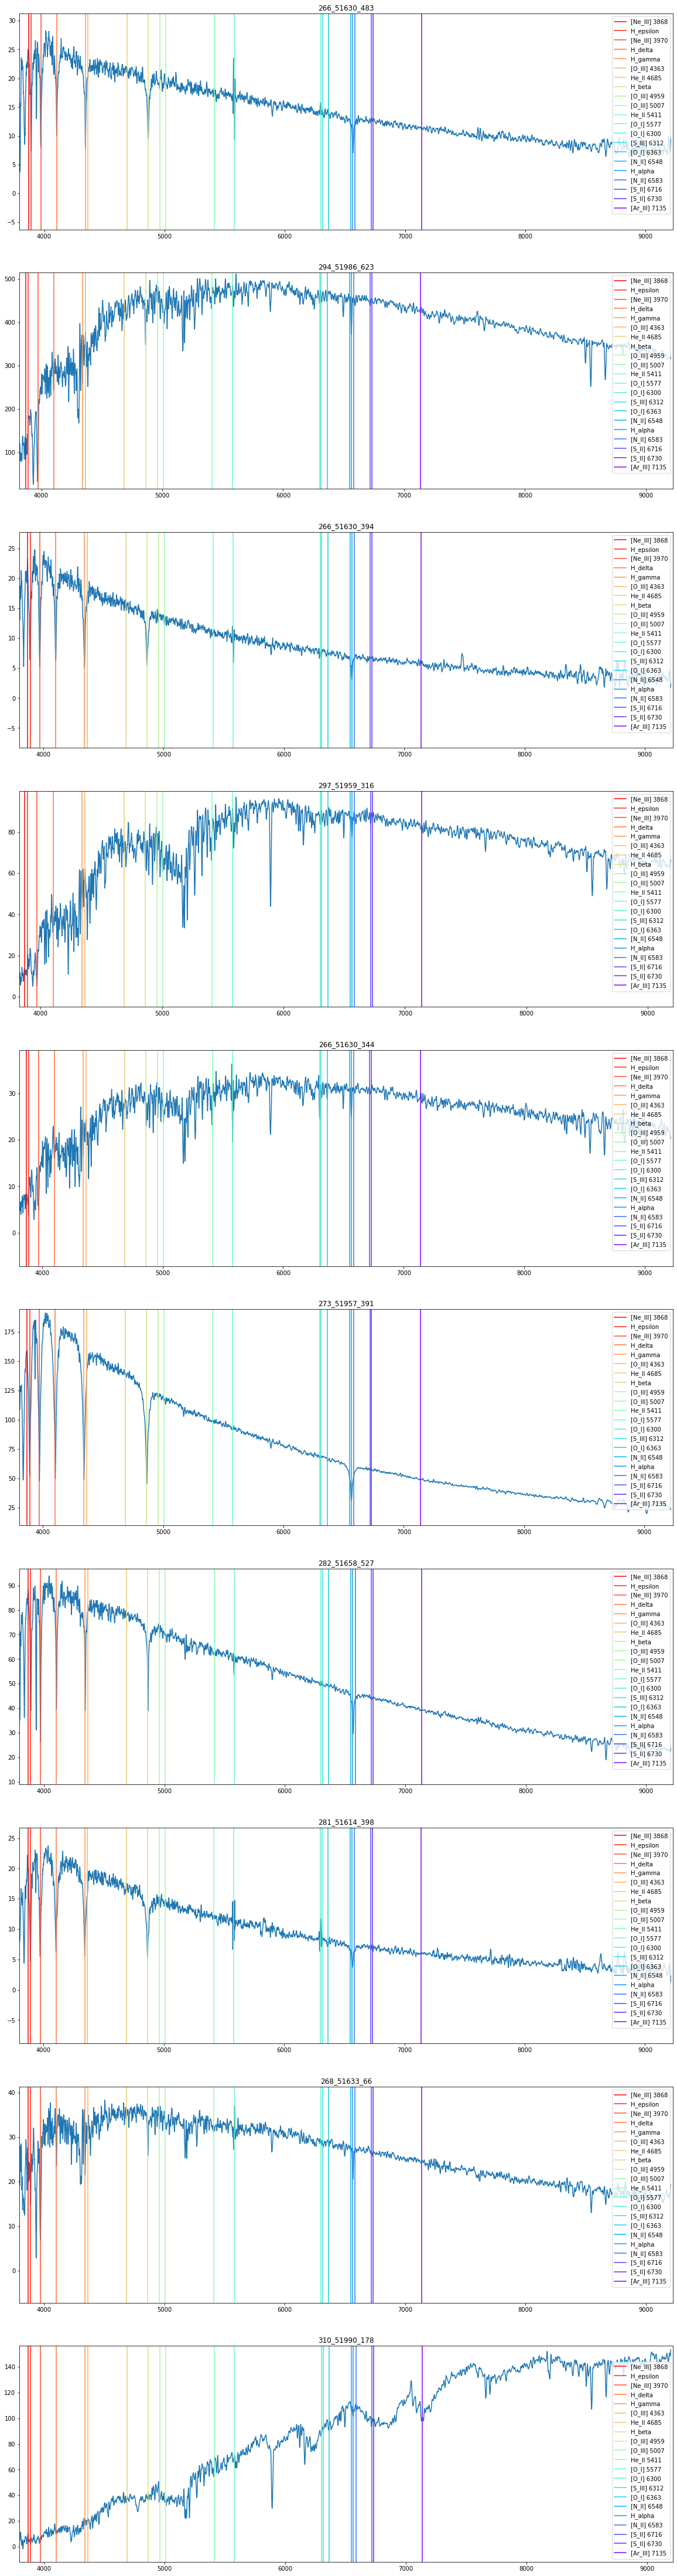

In [5]:
# plotting the spectrum
%matplotlib inline
fig,axs = plt.subplots(nrows=len(sky_server_data), ncols=1)
count = 0
for name,xspec,yspec, lineName,lineWave,_ in sky_server_data:
    plot_spectrum(name,xspec,yspec, lineName,lineWave, axs[count])
    count += 1

fig.set_size_inches((20,80))

# Spectral type using ML

In [3]:
# loading data guide downloaded from dr16
dr16 = pd.read_csv("data/optical_search_373198.csv")

In [4]:
# show head
dr16.head(5)

#plate    mjd  fiberid run2d            specobj_id             ra  \
0     266  51602       14  '26'  '299493250387961856'  '09:47:39.30'   
1     266  51602       22  '26'  '299495449411217408'  '09:49:01.28'   
2     266  51602       28  '26'  '299497098678659072'  '09:48:11.50'   
3     266  51602       29  '26'  '299497373556566016'  '09:48:22.02'   
4     266  51602       31  '26'  '299497923312379904'  '09:49:17.06'   

              dec  sn_median_r         z      zerr  zwarning   class subclass  
0  '-00:38:40.13'        18.71  0.000661  0.000023         0  'STAR'     'A0'  
1  '-00:19:09.61'        38.56 -0.000203  0.000017         0  'STAR'     'WD'  
2  '-00:19:39.73'        40.33 -0.000031  0.000008         0  'STAR'     'F2'  
3  '-00:04:38.45'         2.28  0.000603  0.000177         0  'STAR'     'WD'  
4  '-00:00:23.67'         7.78 -0.000037  0.000088         0  'STAR'     'WD'

In [5]:
# download the first 1000 files for training ML models
first1000 = dr16.iloc[:1000]
first1000.apply(lambda r: download_file_16(r["#plate"],r["mjd"],r["fiberid"]),axis=1)

266 51602 14
266 51602 22
266 51602 28
266 51602 29
266 51602 31
266 51602 32
266 51602 34
266 51602 41
266 51602 45
266 51602 51
266 51602 65
266 51602 84
266 51602 87
266 51602 96
266 51602 125
266 51602 139
266 51602 146
266 51602 178
266 51602 181
266 51602 182
266 51602 225
266 51602 229
266 51602 247
266 51602 292
266 51602 314
266 51602 315
266 51602 343
266 51602 347
266 51602 359
266 51602 362
266 51602 364
266 51602 365
266 51602 396
266 51602 397
266 51602 400
266 51602 407
266 51602 431
266 51602 450
266 51602 466
266 51602 494
266 51602 498
266 51602 500
266 51602 513
266 51602 537
266 51602 545
266 51602 548
266 51602 567
266 51602 576
266 51602 599
266 51602 619
266 51602 631
266 51602 634
266 51630 15
266 51630 21
266 51630 26
266 51630 31
266 51630 32
266 51630 37
266 51630 38
266 51630 43
266 51630 49
266 51630 56
266 51630 57
266 51630 64
266 51630 82
266 51630 95
266 51630 98
266 51630 130
266 51630 140
266 51630 149
266 51630 173
266 51630 187
266 51630 197
266 516

275 51910 361
275 51910 382
275 51910 395
275 51910 397
275 51910 399
275 51910 402
275 51910 413
275 51910 423
275 51910 458
275 51910 463
275 51910 487
275 51910 493
275 51910 496
275 51910 513
275 51910 522
275 51910 531
275 51910 540
275 51910 542
275 51910 548
275 51910 575
275 51910 640
276 51909 11
276 51909 12
276 51909 33
276 51909 40
276 51909 44
276 51909 47
276 51909 50
276 51909 73
276 51909 90
276 51909 97
276 51909 104
276 51909 109
276 51909 115
276 51909 123
276 51909 158
276 51909 160
276 51909 173
276 51909 196
276 51909 205
276 51909 206
276 51909 207
276 51909 212
276 51909 226
276 51909 227
276 51909 228
276 51909 234
276 51909 240
276 51909 259
276 51909 262
276 51909 275
276 51909 284
276 51909 289
276 51909 298
276 51909 304
276 51909 307
276 51909 309
276 51909 317
276 51909 318
276 51909 338
276 51909 358
276 51909 370
276 51909 372
276 51909 374
276 51909 389
276 51909 390
276 51909 399
276 51909 402
276 51909 404
276 51909 406
276 51909 408
276 51909 409
27

0      None
1      None
2      None
3      None
4      None
       ... 
995    None
996    None
997    None
998    None
999    None
Length: 1000, dtype: object

In [23]:
# listing downloaded files
files = glob.glob("data/*.fits")

In [24]:
# (wavelength, flux, class, subclass)
spectrum_class = [get_spectrum_and_class(f) for f in files]

data/276_51909_205.fits
data/269_51910_539.fits
data/275_51910_42.fits
data/266_51630_346.fits
data/276_51909_593.fits
data/269_51581_305.fits
data/277_51908_496.fits
data/277_51908_183.fits
data/277_51908_479.fits
data/269_51581_240.fits
data/270_51909_567.fits
data/270_51909_249.fits
data/266_51630_487.fits
data/276_51909_317.fits
data/273_51957_167.fits
data/280_51612_316.fits
data/272_51941_517.fits
data/271_51883_67.fits
data/267_51608_602.fits
data/279_51984_83.fits
data/273_51957_472.fits
data/266_51602_567.fits
data/266_51602_41.fits
data/276_51909_478.fits
data/269_51910_85.fits
data/269_51581_201.fits
data/271_51883_487.fits
data/269_51910_201.fits
data/281_51614_279.fits
data/280_51612_584.fits
data/277_51908_316.fits
data/268_51633_293.fits
data/269_51910_313.fits
data/266_51602_619.fits
data/271_51883_26.fits
data/272_51941_556.fits
data/269_51910_104.fits
data/269_51581_554.fits
data/277_51908_414.fits
data/281_51614_64.fits
data/269_51910_46.fits
data/273_51957_366.fits


data/276_51909_452.fits
data/277_51908_10.fits
data/275_51910_247.fits
data/273_51957_360.fits
data/266_51630_395.fits
data/272_51941_89.fits
data/279_51608_321.fits
data/269_51910_339.fits
data/281_51614_245.fits
data/269_51910_513.fits
data/276_51909_556.fits
data/270_51909_84.fits
data/271_51883_403.fits
data/269_51910_285.fits
data/278_51900_319.fits
data/276_51909_413.fits
data/268_51633_186.fits
data/279_51608_64.fits
data/267_51608_501.fits
data/266_51630_49.fits
data/274_51913_536.fits
data/279_51608_225.fits
data/273_51957_459.fits
data/281_51614_75.fits
data/273_51957_265.fits
data/271_51883_639.fits
data/267_51608_150.fits
data/274_51913_130.fits
data/268_51633_304.fits
data/267_51608_557.fits
data/273_51957_377.fits
data/281_51614_244.fits
data/266_51630_394.fits
data/269_51581_292.fits
data/276_51909_404.fits
data/281_51614_317.fits
data/268_51633_129.fits
data/269_51910_41.fits
data/276_51909_453.fits
data/277_51908_11.fits
data/280_51612_69.fits
data/266_51630_140.fits
d

data/278_51900_639.fits
data/271_51883_123.fits
data/275_51910_458.fits
data/276_51909_426.fits
data/269_51581_526.fits
data/275_51910_423.fits
data/273_51957_504.fits
data/272_51941_461.fits
data/269_51581_224.fits
data/281_51614_122.fits
data/273_51957_338.fits
data/266_51602_407.fits
data/279_51608_92.fits
data/273_51957_103.fits
data/272_51941_86.fits
data/276_51909_11.fits
data/275_51910_531.fits
data/266_51602_450.fits
data/277_51908_626.fits
data/277_51908_276.fits
data/276_51909_109.fits
data/281_51614_163.fits
data/271_51883_549.fits
data/277_51908_325.fits
data/276_51909_50.fits
data/269_51910_398.fits
data/270_51909_145.fits
data/272_51941_532.fits
data/272_51941_162.fits
data/277_51908_372.fits
data/276_51909_298.fits
data/280_51612_71.fits
data/267_51608_293.fits
data/279_51608_221.fits
data/266_51602_96.fits
data/274_51913_532.fits
data/273_51957_325.fits
data/280_51612_154.fits
data/270_51909_322.fits
data/277_51908_55.fits
data/281_51614_241.fits
data/274_51913_359.fits

In [25]:
# creating pandas dataframe for easier data manipulation
specdf = pd.DataFrame(spectrum_class,columns=["xspec","yspec","class","subclass"])
specdf.shape

(1000, 4)

In [26]:
# cleaning data
specdf = clean_data(specdf)

In [27]:
# transforming spectrum data to spectrum image\n,
def transform_spectrum(spec,chunksize=100,chunk_width=10):
    new_size = int(spec.shape[0]/chunksize)*chunksize
    spectrum = spec[:new_size]
    groups = spectrum.reshape((-1,chunksize))
    #f_groups = np.abs(fft(groups))
    plt.gcf().clear()
    plt.imshow(groups.T,aspect=0.1,cmap="viridis")
    plt.axis('off')
    plt.tick_params(axis='both', left='off', top='off', 
                    right='off', bottom='off', 
                    labelleft='off', labeltop='off', 
                    labelright='off', labelbottom='off')
    return to_pil(plt.gcf())

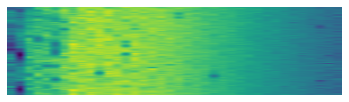

In [28]:
"""takes a long time..."""
# creating spectrum image column by transforming the flux column
specdf["image"] = specdf["yspec"].apply(transform_spectrum)

In [29]:
# checking distribution of spectral type
specdf["spectral_type"].value_counts()

F    314
A    214
M    142
K    120
G    107
W     83
C      8
O      6
B      4
L      1
Name: spectral_type, dtype: int64

In [44]:
# including only top 6 stellar classes because they contain enough data
inClass = ["F","A","M","K","W","G"]
mldf = specdf[specdf["spectral_type"].isin(inClass)]

In [77]:
ml_input = transform_imgs_to_arrays(list(mldf["image"]))
ml_target = encode_target(list(mldf["spectral_type"]),inClass)

In [53]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D,Dense
from keras.models import Model
# load VGG16 model (You need to download the weight file)
base_model = VGG16(include_top=False,weights="./models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",input_shape=(224,224,3))
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(6, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [54]:
# splitting data to training and testing
training_idxs,testing_idxs = split_data(ml_input,ml_target)

In [57]:
# fit or load weight
#model.fit(ml_input[training_idxs],ml_target[training_idxs],epochs=20)
model.load_weights("models/spectral_type.h5")

In [56]:
#model.save("models/spectral_type.h5")

In [ ]:
# predicting test data
p_labels,p_targets = utils.predict(model,ml_input[[testing_idxs]],ml_target[testing_idxs])

In [ ]:
# printing confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(p_labels, p_targets)

**Check our data**

In [80]:
# creating dataframe from sky server data discussed above
ssdf = pd.DataFrame(sky_server_data,columns=["name","xspec","yspec",
                                             "linenames","linevalues","class"])

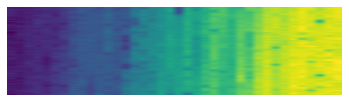

In [83]:
ssdf["image"] = ssdf["yspec"].apply(transform_spectrum)

In [84]:
# transforming image into array and selecting only first 3 channels 
ssdf["image_array"] = ssdf["image"].apply(asarray)
ssdf["image_array"] = ssdf["image_array"].apply(lambda x: x[:,:,:3])

In [85]:
# creating input data array
ssdf_input = np.array(list(ssdf["image_array"]))

In [86]:
# predicting test data
p_ssdf_labels = predict(model,ssdf_input,None)

In [87]:
# creating new column for the predicted labels
ssdf["predicted"] = p_ssdf_labels

In [88]:
# checking results
ssdf[["class","predicted"]]

class predicted
0     A         A
1     F         F
2     A         A
3     K         K
4     K         K
5     A         A
6     A         A
7     A         A
8     F         F
9     M         M